Open in [nbviewer](http://nbviewer.jupyter.org/github/luiarthur/ts_AMS223/blob/master/hw/hw1/hw1.ipynb)
$
% Latex definitions
% note: Ctrl-shfit-p for shortcuts menu
\newcommand{\iid}{\overset{iid}{\sim}}
\newcommand{\ind}{\overset{ind}{\sim}}
\newcommand{\p}[1]{\left(#1\right)}
\newcommand{\bk}[1]{\left[#1\right]}
\newcommand{\bc}[1]{ \left\{#1\right\} }
\newcommand{\abs}[1]{ \left|#1\right| }
\newcommand{\norm}[1]{ \left|\left|#1\right|\right| }
\newcommand{\E}{ \text{E} }
\newcommand{\N}{ \mathcal N }
\newcommand{\ds}{ \displaystyle }
\newcommand{\R}{ \mathbb{R} }
\newcommand{\suml}{ \sum_{i=1}^n }
\newcommand{\prodl}{ \prod_{i=1}^n }
\newcommand{\overunderset}[3]{\overset{#1}{\underset{#2}{#3}}}
\newcommand{\asym}{\overset{\cdot}{\sim}}
\newcommand{\given}{\bigg |}
\newcommand{\M}{\mathcal{M}}
\newcommand{\Mult}{\text{Mult}}
\newcommand{\I}{\mathbf{I}}
\newcommand{\F}{\mathbf{F}}
\newcommand{\bphi}{\mathbf{\phi}}
\newcommand{\y}{\mathbf{y}}
$

Homework 1

Due on Tu 01/24

Prado & West: Chapter 1, Problems: 2, 3, 4, 5, 7; Chapter 2: Problem 1.

For each of the Chapter 1 datasets posted in the data dir: 
  1. plot the data
  2. plot the sample autocorrelation functions. For the SOI series: smooth the series using moving averages (try different orders and weights). For the USA GDP time series: plot the first and second differences and the corresponding sample autocorrelation functions. 

Comments about the homework:

Problem 5: assume that $\omega_0$'s are fixed.

Problem 7: assume that $d=1$ and work with the conditional likelihood.


---

# 1.2
**Consider the AR(1) model $y_t = \phi y_{t-1} + \epsilon_{t}$, with $\epsilon_t \ind \N(0,v)$. **
**a) Find the MLE of $(\phi,v)$ under the conditional likelihood. **
**b) Find the MLE of $(\phi,v)$ under the unconditional likelihood (1.17).**
**c) Assume that $v$ is known, find the MAP estimator of $\phi$ under a uniform prior $\phi \sim U(-1,1)$ for the conditional and unconditional priors.**

# 1.3
**Show that the distributions of $(\phi|\y,\F)$ and $(v|\y,\F)$ obtained for the AR(1) 
reference analysis are those given in Example 1.6.**


# 1.4
**Show that the distributions of $(\phi|\y,\F)$ and $(v|\y,\F)$ obtained for the AR(1) 
conjugate analysis are those given in Example 1.7.**

***

I've done each of these, they are tedious but easy. The main take-aways are to write down the likelihoods correctly, and **keep all relevant terms in the kernel**! 
Specifically, for 1.3 and 1.4, keep in mind that $p(\phi,v|F,y) \propto p(\phi,v) p(y | \phi,v,F,y)$. But we then
need to compute $p(\phi|\y,\F)$ and $p(v|\y,\F)$ by integrating the joint posterior. So, we need all terms including the relevant parameters up to that point. It is alright to remove other constants. Just do it carefully.

# 1.5

## 5a 

- $y_t = \phi_1 y_{t-1} + \phi_2 y_{t-2} + \epsilon_t$,... model 1
- $y_t = a\cos(2\pi\omega_0 t) + b\sin(2\pi\omega_0 t) + \epsilon_t$,... model 2


In [30]:
genAR <- function(n,phi,p=length(phi),sig=1) {
    # generate an ap(p) process with n observations and phi as coefficients
    
    y <- double(n)  
    
    for (i in 1:p) y[i] <- rnorm(1,0,sig)
        
    for (i in (p+1):n) {
        y[i] <- sum(y[(i-1):(i-p)] * phi) + rnorm(1,0,sig)
    }
        
    y
}
    
genFourier <- function(n,a,b,w,sig) {
    t <- 1:n
    rnorm(n, a*cos(2*pi*w*t) + b*cos(2*pi*w*t), sig)
}

In [31]:
set.seed(223)
n <- 200
v <- 1

phi <- c(.5,-.9)
y1 <- genAR(n, phi, sig=sqrt(v))

a <- 2; b <- -3; w <- .5
y2 <- genFourier(n,a,b,w,sig=sqrt(v))

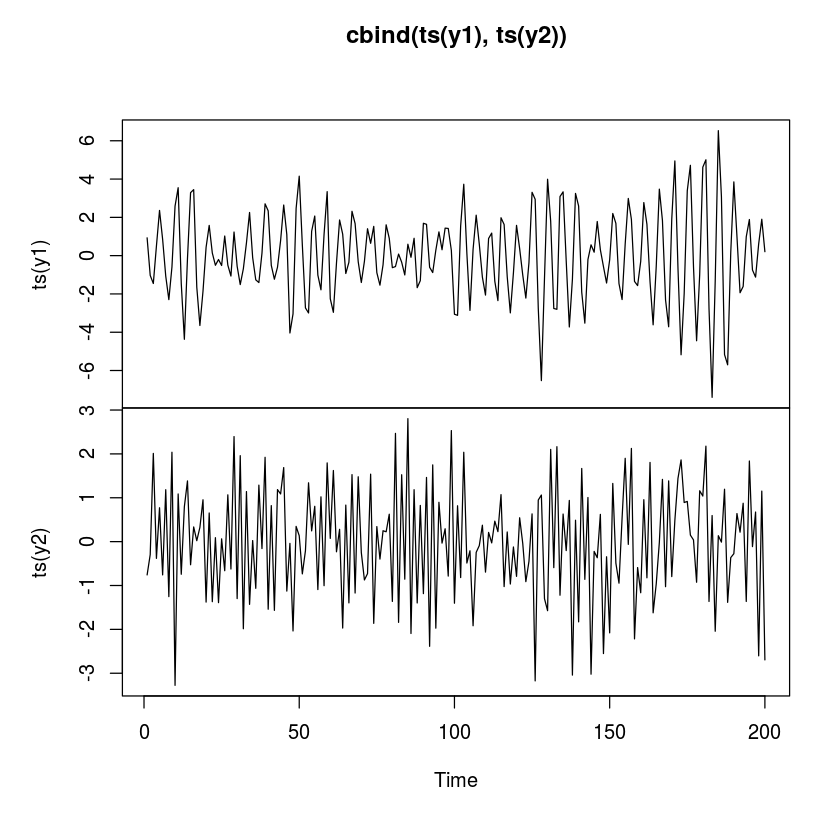

In [32]:
plot(cbind(ts(y1),ts(y2)))

# The rest of the homework... 

- 1.5(b,c,d,e,f), 1.7 are easy


# 2.1
$\newcommand{\sumj}{\sum_{j=0}^\infty}$
$\newcommand{\Var}{\text{Var}}$

Consider the AR(1) process $y_t = \phi y_{t-1} + \epsilon_t$ where $\epsilon \ind \N(0,v)$. 
If $\abs{\phi} < 1$ then $y_t = \sumj \phi^j \epsilon_{t-j}$.
Using this, show that $y_1 \sim \N\p{0,\ds\frac{v}{1-\phi^2}}$, and consequently that
$p(y_{1:n}) = \ds\frac{(1-\phi^2)^{1/2}}{(2\pi v)^{n/2}}\exp\bc{-\frac{y_1^2(1-\phi^2) + \sum_2^n(y_t-\phi y_{t-1})^2}{2v}}$.

---


First note that $y_1 = \sum_{j=1}^\infty \phi^j\epsilon_{1-j}$ is a linear combination of Normal distributions,
and so is also a Normal distribution. That is $y_1 \sim \N(m,s^2)$, with $m$ and $s^2$ as follows:

\begin{split}
m &= \E\bk{\sumj \phi^j \epsilon_{1-j}} \\
&= \sumj \phi^j \E\bk{\epsilon_{1-j}}  \\
&= \sumj \phi^j 0 \\
&= 0.
\end{split}

\begin{split}
s^2 &= \Var\bk{\sumj \phi^j \epsilon_{1-j}} \\
&= \sumj \Var\bk{\phi^j \epsilon_{1-j}} \\
&= \sumj \phi^{2j}\Var\bk{ \epsilon_{1-j}} \\
&= \sumj \phi^{2j} v\\
&= v \sumj (\phi^2)^j \\
&= v \ds\frac{1}{1-\phi^2}, \text{ as this a geometric series} \\
&= \ds\frac{v}{1-\phi^2}.
\end{split}

Therefore, $y_1 \sim \N\p{0,\ds\frac{v}{1-\phi^2}}$. The density $p(y_{1:n})$ follows naturally.